In [582]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [505]:
df = pd.read_csv("C:\\Users\\deves\\Desktop\\uv\\data\\sales_data.csv")

In [506]:
df.sample()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
175,10301,14,1123.4,80.24,49.9,3.56,21-Nov-18,24-Oct-21,76.29,1,...,279.36,548.97,0,8,6,0,0.0,809.06,314.34,0.0


In [507]:
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,30-Dec-16,24-Oct-21,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,31-Mar-18,24-Oct-21,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,30-Nov-17,24-Oct-21,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,9-Apr-19,24-Oct-21,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,23-Oct-20,24-Oct-21,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [508]:
df.isnull().sum()

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 5000 non-null   int64  
 1   TOTAL_ORDERS               5000 non-null   int64  
 2   REVENUE                    5000 non-null   float64
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64
 4   CARRIAGE_REVENUE           5000 non-null   float64
 5   AVERAGESHIPPING            5000 non-null   float64
 6   FIRST_ORDER_DATE           5000 non-null   object 
 7   LATEST_ORDER_DATE          5000 non-null   object 
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64
 9   DAYSSINCELASTORDER         5000 non-null   int64  
 10  MONDAY_ORDERS              5000 non-null   int64  
 11  TUESDAY_ORDERS             5000 non-null   int64  
 12  WEDNESDAY_ORDERS           5000 non-null   int64  
 13  THURSDAY_ORDERS            5000 non-null   int64

## VALIDATION OF COLUMNS DATA

In [510]:
print(f"Sum of Total Revenue :  {df['REVENUE'].sum()}")


columns = ["TIME_0000_0600_REVENUE",	"TIME_0601_1200_REVENUE",	"TIME_1200_1800_REVENUE",	"TIME_1801_2359_REVENUE"]
sum =0
for col in columns:
    sum += df[col].sum()
print(f"Sum of time slots revenue columns: {sum}")

columns = ["WEEK1_DAY01_DAY07_REVENUE",	"WEEK2_DAY08_DAY15_REVENUE",	"WEEK3_DAY16_DAY23_REVENUE",	"WEEK4_DAY24_DAY31_REVENUE"]
sum =0
for col in columns:
    sum += df[col].sum()
print(f"Sum of WEEK vise revenue columns: {sum}")

columns = ["MONDAY_REVENUE",	"TUESDAY_REVENUE",	"WEDNESDAY_REVENUE",	"THURSDAY_REVENUE",	"FRIDAY_REVENUE"	,"SATURDAY_REVENUE", "SUNDAY_REVENUE"]
sum =0
for col in columns:
    sum += df[col].sum()
print(f"Sum of DAY vise revenue columns: {sum}")

Sum of Total Revenue :  8407619.2
Sum of time slots revenue columns: 8407619.2
Sum of WEEK vise revenue columns: 8407619.2
Sum of DAY vise revenue columns: 8407619.200000001


In [511]:
print(f"Sum of Total orders :  {df['TOTAL_ORDERS'].sum()}")


columns = ["TIME_0000_0600_ORDERS",	"TIME_0601_1200_ORDERS",	"TIME_1200_1800_ORDERS",	"TIME_1801_2359_ORDERS"]
sum =0
for col in columns:
    sum += df[col].sum()
print(f"Sum of time slots orders columns: {sum}")

columns = ["WEEK1_DAY01_DAY07_ORDERS",	"WEEK2_DAY08_DAY15_ORDERS",	"WEEK3_DAY16_DAY23_ORDERS",	"WEEK4_DAY24_DAY31_ORDERS"]
sum =0
for col in columns:
    sum += df[col].sum()
print(f"Sum of WEEK vise orders columns: {sum}")

columns = ["MONDAY_ORDERS",	"TUESDAY_ORDERS",	"WEDNESDAY_ORDERS",	"THURSDAY_ORDERS",	"FRIDAY_ORDERS"	,"SATURDAY_ORDERS", "SUNDAY_ORDERS"]
sum =0
for col in columns:
    sum += df[col].sum()
print(f"Sum of DAY vise revenue columns: {sum}")

Sum of Total orders :  64352
Sum of time slots orders columns: 64352
Sum of WEEK vise orders columns: 64352
Sum of DAY vise revenue columns: 64352


In [512]:
df["CustomerID"].duplicated().any()

np.False_

In [513]:
df['AVERAGE_ORDER_VALUE'].sum()

np.float64(682686.8899999999)

In [514]:
(df["REVENUE"]/df["TOTAL_ORDERS"]).sum()

np.float64(682684.732711905)

In [600]:
df['Calc'] = (df['REVENUE'] / df['TOTAL_ORDERS']).round(2)

df['AOV_close'] = np.isclose(
    df['AVERAGE_ORDER_VALUE'],
    df['Calc'],
    atol=0.01,     
)


mismatches = df[~df['AOV_close']]
print(mismatches[["Calc", "AVERAGE_ORDER_VALUE" ]])
print(f"Found {len(mismatches)} mismatches in AVERAGE_ORDER_VALUE")

Empty DataFrame
Columns: [Calc, AVERAGE_ORDER_VALUE]
Index: []
Found 0 mismatches in AVERAGE_ORDER_VALUE


In [599]:
df['Calc'] = (df['CARRIAGE_REVENUE'] / df['TOTAL_ORDERS']).round(2)

df['AOV_close'] = np.isclose(
    df['AVERAGESHIPPING'],
    df['Calc'],
    atol=0.01,     
)


mismatches = df[~df['AOV_close']]
print(mismatches[["Calc", "AVERAGESHIPPING" ]])
print(f"Found {len(mismatches)} mismatches in Average Shipping")

Empty DataFrame
Columns: [Calc, AVERAGESHIPPING]
Index: []
Found 0 mismatches in Average Shipping


In [516]:
df['FIRST_ORDER_DATE'] = pd.to_datetime(df['FIRST_ORDER_DATE'], format="%d-%b-%y", errors='coerce')
df['LATEST_ORDER_DATE'] = pd.to_datetime(df['LATEST_ORDER_DATE'], format="%d-%b-%y", errors='coerce')

df['calc'] = ((df['LATEST_ORDER_DATE'] - df['FIRST_ORDER_DATE']).dt.days / (df['TOTAL_ORDERS'])).round(2)


df['AOV_close'] = np.isclose(df['calc'], df['AVGDAYSBETWEENORDERS'], atol=0.01)


mismatches = df[~df['AOV_close']]

print(f"Found {len(mismatches)} mismatches in AVGDAYSBETWEENORDERS")
print(mismatches[['calc', 'AVGDAYSBETWEENORDERS']])


Found 0 mismatches in AVGDAYSBETWEENORDERS
Empty DataFrame
Columns: [calc, AVGDAYSBETWEENORDERS]
Index: []


## ANALYSIS OF DATA

In [517]:
avg_orders = df["TOTAL_ORDERS"].mean()
max_orders = df["TOTAL_ORDERS"].max()
min_orders = df["TOTAL_ORDERS"].min()

avg_revenue = df["REVENUE"].mean()
max_revenue = df["REVENUE"].max()
min_revenue = df["REVENUE"].min()

print(f"Average orders per customer: {avg_orders}")
print(f"Maximum orders by a single customer: {max_orders}")
print(f"Minimum orders: {min_orders}")
print(f"Average revenue per customer: ₹{avg_revenue:.0f}")
print(f"Maximum revenue: ₹{max_revenue:.0f}")
print(f"Minimum revenue: ₹{min_revenue:.0f}")


Average orders per customer: 12.8704
Maximum orders by a single customer: 156
Minimum orders: 1
Average revenue per customer: ₹1682
Maximum revenue: ₹34847
Minimum revenue: ₹38


In [518]:
total_revenue = df['REVENUE'].sum()
total_shipping = df['CARRIAGE_REVENUE'].sum()

{
    'Shipping Revenue % of Total': 100 * total_shipping / total_revenue
}


{'Shipping Revenue % of Total': np.float64(2.7377771819161363)}

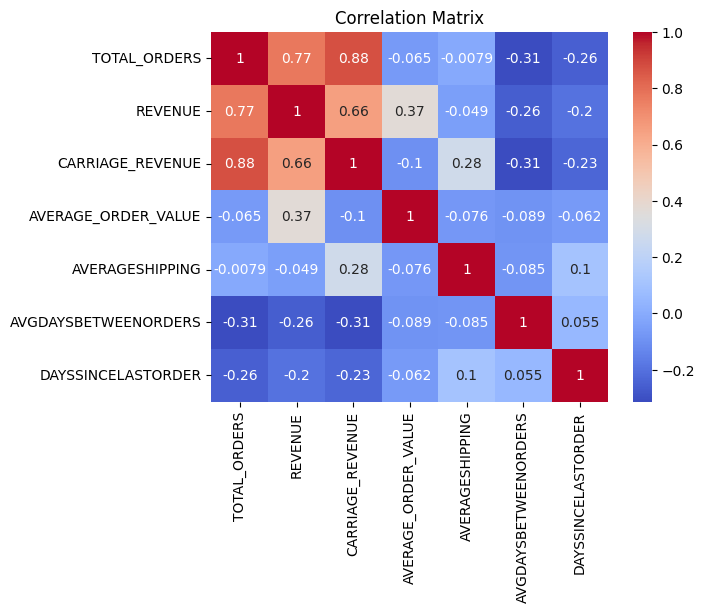

In [519]:
numeric_cols = [
    "TOTAL_ORDERS", "REVENUE", "CARRIAGE_REVENUE", "AVERAGE_ORDER_VALUE",
    "AVERAGESHIPPING", "AVGDAYSBETWEENORDERS", "DAYSSINCELASTORDER"
]

sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

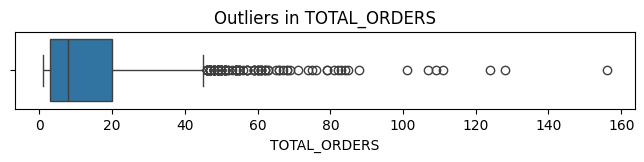

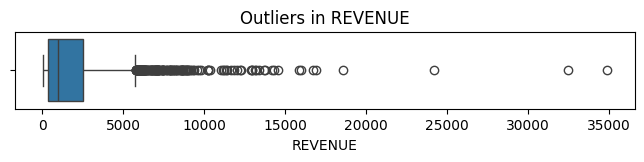

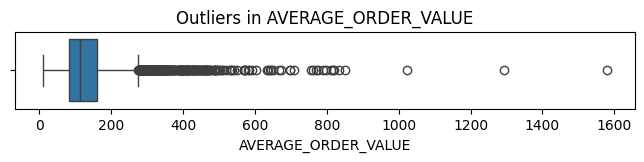

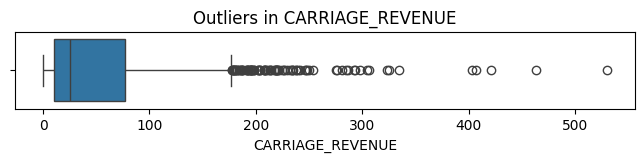

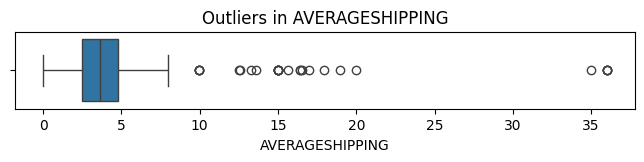

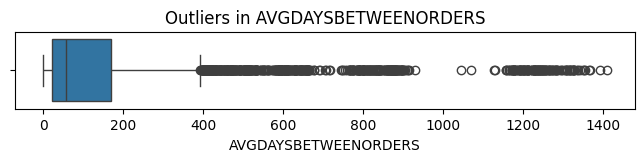

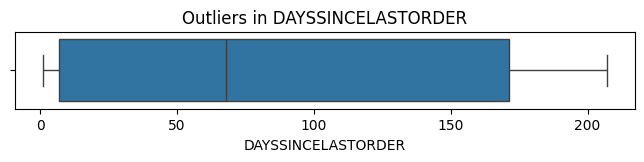

In [520]:
num_cols = ['TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE', 'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER']
for col in num_cols:
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [521]:
def count_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers found.")
    return outliers

count_outliers('TOTAL_ORDERS')



TOTAL_ORDERS: 112 outliers found.


,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Calc,AOV_close,calc
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,61,37,14,1067.92,5674.65,3916.53,1327.44,4.27,True,14.19
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,13,24,44,30.25,3143.69,2205.47,5646.55,1.19,True,15.89
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,9,27,13,501.34,1197.83,3004.77,1559.50,3.26,True,6.65
5,153,49,5841.24,119.21,96.84,1.98,2015-07-26,2021-10-24,46.57,1,...,20,23,6,0.00,2482.33,2759.43,599.48,1.98,True,46.57
7,219,54,5200.53,96.31,237.53,4.40,2019-11-19,2021-10-24,13.06,1,...,22,24,6,273.18,2328.21,1980.99,618.15,4.40,True,13.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,188,50,5458.29,109.17,186.69,3.73,2018-03-25,2021-05-30,23.24,148,...,8,23,19,0.00,748.33,2795.05,1914.91,3.73,True,23.24
3624,14,57,13355.00,234.30,192.15,3.37,2014-03-18,2021-05-23,46.02,155,...,13,17,26,104.99,2892.55,3422.85,6934.61,3.37,True,46.02
3808,189,47,5455.86,116.08,87.86,1.87,2016-12-04,2021-04-30,34.21,178,...,11,13,22,151.00,1194.97,1816.96,2292.93,1.87,True,34.21
3830,523,57,3860.69,67.73,18.99,0.33,2015-06-08,2021-04-28,37.74,180,...,18,17,18,314.55,1264.49,960.90,1320.75,0.33,True,37.74


In [522]:
count_outliers('REVENUE')

REVENUE: 163 outliers found.


,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Calc,AOV_close,calc
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,61,37,14,1067.92,5674.65,3916.53,1327.44,4.27,True,14.19
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,13,24,44,30.25,3143.69,2205.47,5646.55,1.19,True,15.89
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,6,12,25,0.00,707.98,2560.91,3990.80,3.99,True,33.12
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,10,13,21,0.00,1908.99,2025.05,3058.23,2.11,True,21.11
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,9,27,13,501.34,1197.83,3004.77,1559.50,3.26,True,6.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,27,31,11225.60,362.12,82.85,2.67,2020-03-21,2021-04-22,12.81,186,...,12,7,8,637.97,2536.84,2753.54,5297.25,2.67,True,12.81
3900,43,38,8969.73,236.05,141.73,3.73,2019-01-19,2021-04-18,21.58,190,...,8,8,13,2917.95,2416.25,998.14,2637.39,3.73,True,21.58
3908,114,23,6461.05,280.92,37.95,1.65,2017-07-22,2021-04-16,59.30,192,...,7,8,8,0.00,891.18,3017.38,2552.49,1.65,True,59.30
3975,87,37,7160.00,193.51,175.70,4.75,2018-07-20,2021-04-04,26.73,204,...,6,9,19,878.58,1007.15,1393.54,3880.73,4.75,True,26.73


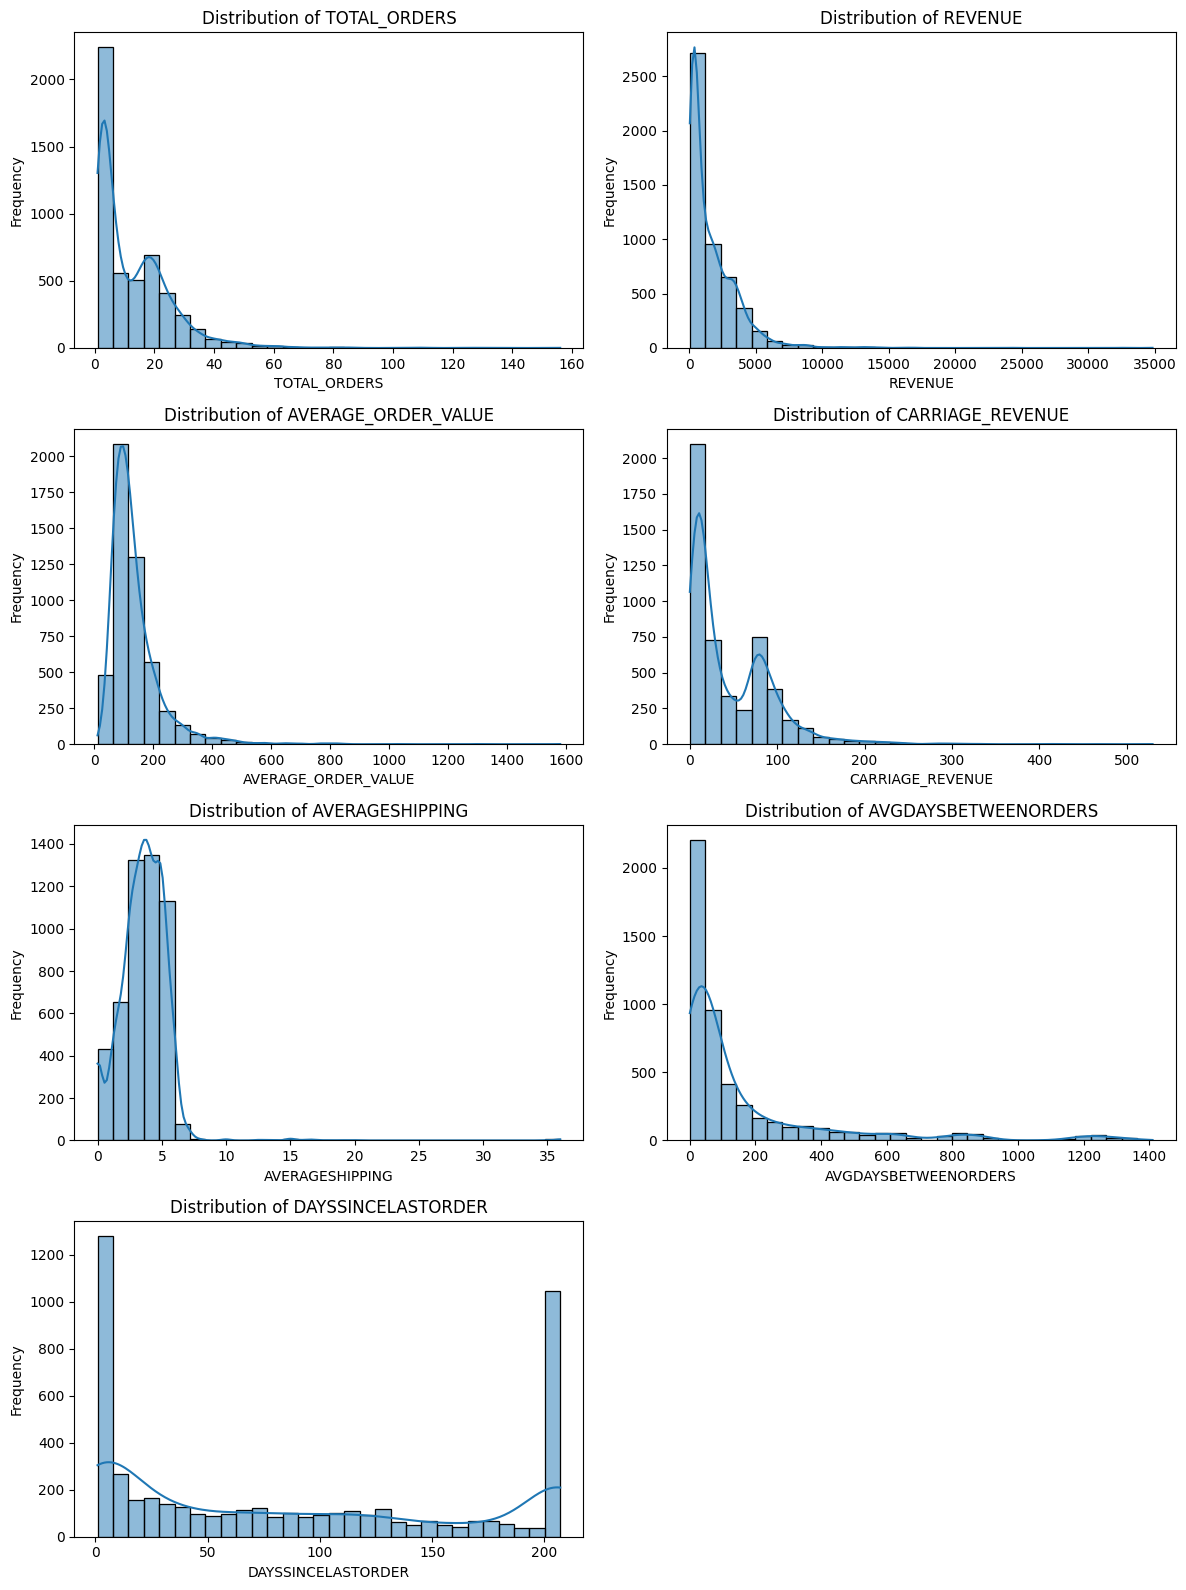

In [523]:
columns_to_plot = [
    'TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE',
    'CARRIAGE_REVENUE', 'AVERAGESHIPPING',
    'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER'
]

n_cols = 2
n_rows = 4 
plt.figure(figsize=(12, 16))

for idx, col in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## ANALYSIS BASED ON CUSTOMER & ORDER DATE

In [524]:
top_10 = df[['CustomerID', 'REVENUE', 'TOTAL_ORDERS']].sort_values(by='REVENUE', ascending=False).head(10)
print(top_10.to_markdown(index='False'))

|   CustomerID |   REVENUE |   TOTAL_ORDERS |
|-------------:|----------:|---------------:|
|            1 |   34847.4 |             61 |
|            2 |   32487   |             59 |
|            3 |   24179   |             53 |
|            4 |   18554.5 |             84 |
|            5 |   16885   |             26 |
|            6 |   16693.8 |             66 |
|            7 |   15999.9 |             81 |
|            8 |   15840.4 |             19 |
|            9 |   14526.7 |             75 |
|           10 |   14309.9 |             47 |


In [525]:
top_10_orders = df[['CustomerID', 'REVENUE', 'TOTAL_ORDERS']].sort_values(by='TOTAL_ORDERS', ascending=False).head(10)
print(top_10_orders.to_markdown(index='False'))


|   CustomerID |   REVENUE |   TOTAL_ORDERS |
|-------------:|----------:|---------------:|
|           26 |  11349.6  |            156 |
|           28 |  11127.8  |            128 |
|           22 |  11986.5  |            124 |
|           47 |   8821.84 |            111 |
|           88 |   7148.66 |            109 |
|           48 |   8774.63 |            107 |
|           23 |  11828.9  |            101 |
|          107 |   6683.75 |             88 |
|          180 |   5552.51 |             85 |
|            4 |  18554.5  |             84 |


In [526]:
avg_d = df['DAYSSINCELASTORDER'].mean()
min_d = df['DAYSSINCELASTORDER'].min()
max_d = df['DAYSSINCELASTORDER'].max()

avg_gap = df['AVGDAYSBETWEENORDERS'].mean()
min_gap = df['AVGDAYSBETWEENORDERS'].min()
max_gap = df['AVGDAYSBETWEENORDERS'].max()

print(f"- Average days since last order: {avg_d:.1f}")
print(f"- Minimum: {min_d} day, Maximum: {max_d} days")
print(f"- Average gap between orders: {avg_gap:.1f} days")
print(f"- Min gap between orders: {min_gap:.1f} days")
print(f"- Max gap between orders: {max_gap:.1f} days")

- Average days since last order: 87.4
- Minimum: 1 day, Maximum: 207 days
- Average gap between orders: 163.2 days
- Min gap between orders: 0.0 days
- Max gap between orders: 1409.5 days


In [527]:
repeat_customers = df[df['TOTAL_ORDERS'] > 1].shape[0]
one_customers = df[df['TOTAL_ORDERS'] == 1].shape[0]
print(f"Number of customers who have ordered more than 1 time: {repeat_customers}")
print(f"Number of customers who ordered only 1 time: {one_customers}")

Number of customers who have ordered more than 1 time: 4634
Number of customers who ordered only 1 time: 366


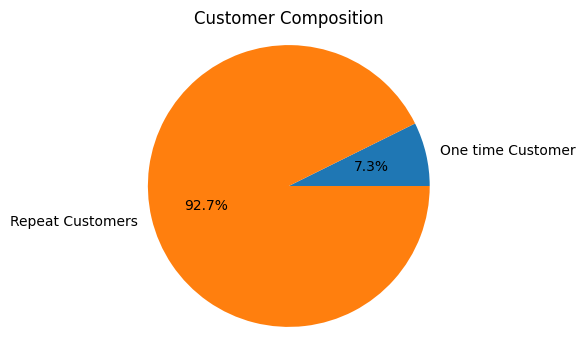

In [528]:
labels = ['One time Customer', 'Repeat Customers']
sizes = [one_customers, repeat_customers]

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Customer Composition")
plt.axis('equal')
plt.show()


In [547]:

recent = df[df['DAYSSINCELASTORDER'] <= 45]
mid = df[(df['DAYSSINCELASTORDER'] > 45) & (df['DAYSSINCELASTORDER'] <= 90)]
old = df[df['DAYSSINCELASTORDER'] > 90]

print(f"Recent: {len(recent)}, Mid: {len(mid)}, Old: {len(old)}")

Recent: 2180, Mid: 655, Old: 2165


In [553]:
new_customers = df[(df['TOTAL_ORDERS'] == 1) & (df["DAYSSINCELASTORDER"]>200)].shape[0]
print(f"Customers who ordered once and never ordered again , excluding new customers: {new_customers}")

Customers who ordered once and never ordered again , excluding new customers: 236


In [531]:
repeat_customers = df[(df['TOTAL_ORDERS'] > 1) & (df["DAYSSINCELASTORDER"]<60) ].shape[0]
new_customers = df[(df['TOTAL_ORDERS'] == 1) & (df["DAYSSINCELASTORDER"]<45)].shape[0]
print(f"Number of customers who have ordered more than 1 time in last 60 days: {repeat_customers}")
print(f"Number of customers who ordered only 1 time with their order more than 45 days ago: {new_customers}")

Number of customers who have ordered more than 1 time in last 60 days: 2241
Number of customers who ordered only 1 time with their order more than 45 days ago: 130


In [556]:
new_customers = df[(df['TOTAL_ORDERS'] == 1) & (df["DAYSSINCELASTORDER"]<250)].shape[0]
print(f"Orders in last 250 days: {new_customers}")

Orders in last 250 days: 366


In [533]:
cust = df[df['DAYSSINCELASTORDER'] > 90]
print("Number of customers who haven't ordered in past 3 months: ")
cust.shape[0]

Number of customers who haven't ordered in past 3 months: 


2165

## ANALYSIS BASED ON REVENUE AND ORDERS

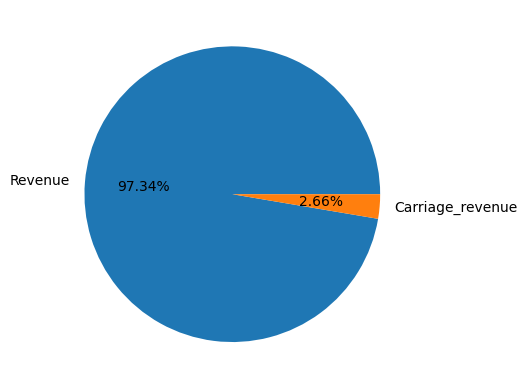

In [534]:
tr = df["REVENUE"].sum()
cr = df["CARRIAGE_REVENUE"].sum()
plt.pie([tr,cr], labels = ["Revenue" , "Carriage_revenue"], autopct = '%1.2f%%')
plt.show()

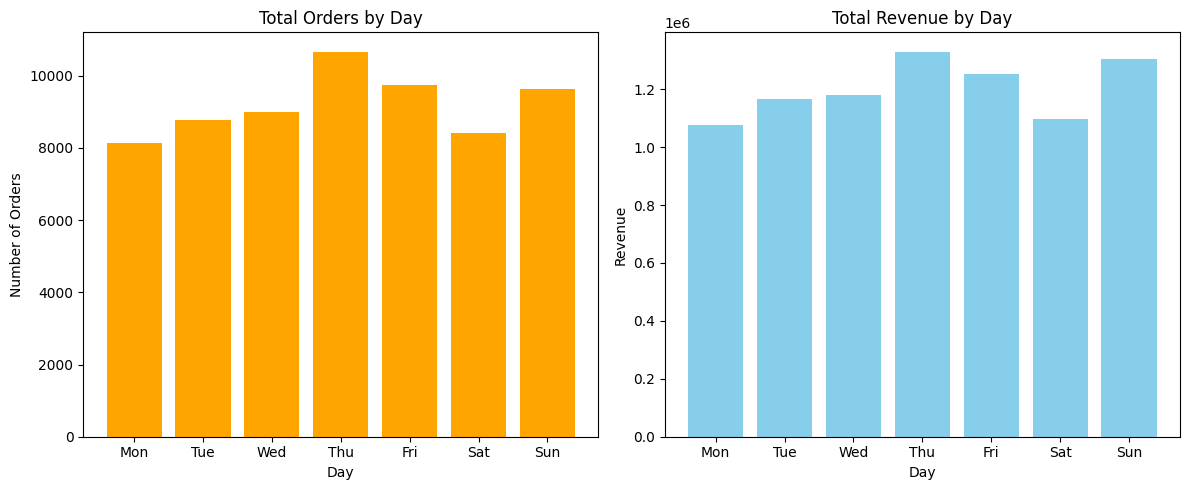

In [535]:

day_order_cols = [
    "MONDAY_ORDERS", "TUESDAY_ORDERS", "WEDNESDAY_ORDERS",
    "THURSDAY_ORDERS", "FRIDAY_ORDERS", "SATURDAY_ORDERS", "SUNDAY_ORDERS"
]

day_revenue_cols = [
    "MONDAY_REVENUE", "TUESDAY_REVENUE", "WEDNESDAY_REVENUE",
    "THURSDAY_REVENUE", "FRIDAY_REVENUE", "SATURDAY_REVENUE", "SUNDAY_REVENUE"
]

labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

orders_by_day = df[day_order_cols].sum()
revenues_by_day = df[day_revenue_cols].sum()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].bar(labels, orders_by_day, color='orange')
axs[0].set_title("Total Orders by Day")
axs[0].set_xlabel("Day")
axs[0].set_ylabel("Number of Orders")
axs[0].tick_params(axis='x')


axs[1].bar(labels, revenues_by_day, color='skyblue')
axs[1].set_title("Total Revenue by Day")
axs[1].set_xlabel("Day")
axs[1].set_ylabel("Revenue")
axs[1].tick_params(axis='x')

plt.tight_layout()
plt.show()


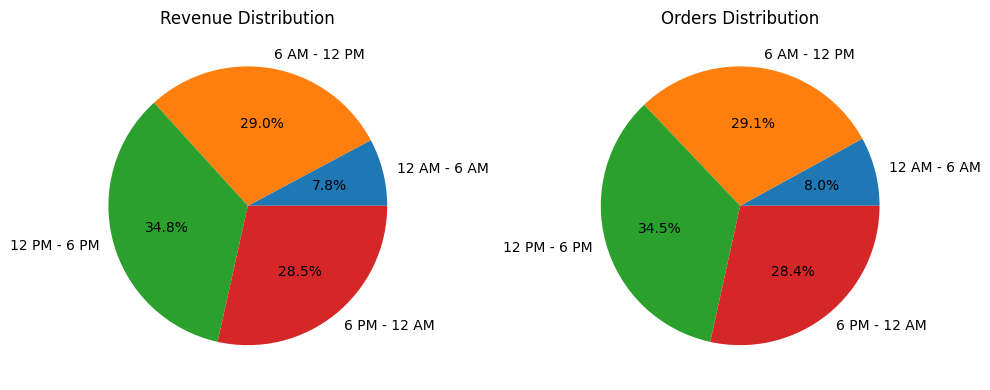

In [536]:
time_slots_revenue = ['TIME_0000_0600_REVENUE', 'TIME_0601_1200_REVENUE', 
                      'TIME_1200_1800_REVENUE', 'TIME_1801_2359_REVENUE']

time_slots_orders = ['TIME_0000_0600_ORDERS', 'TIME_0601_1200_ORDERS', 
                     'TIME_1200_1800_ORDERS', 'TIME_1801_2359_ORDERS']

labels = ['12 AM - 6 AM', '6 AM - 12 PM', '12 PM - 6 PM', '6 PM - 12 AM']

revenues = [df[slot].sum() for slot in time_slots_revenue]
orders = [df[slot].sum() for slot in time_slots_orders]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(revenues, labels=labels, autopct='%1.1f%%')
axs[0].set_title('Revenue Distribution')

axs[1].pie(orders, labels=labels, autopct='%1.1f%%')
axs[1].set_title('Orders Distribution')

plt.tight_layout()
plt.show()


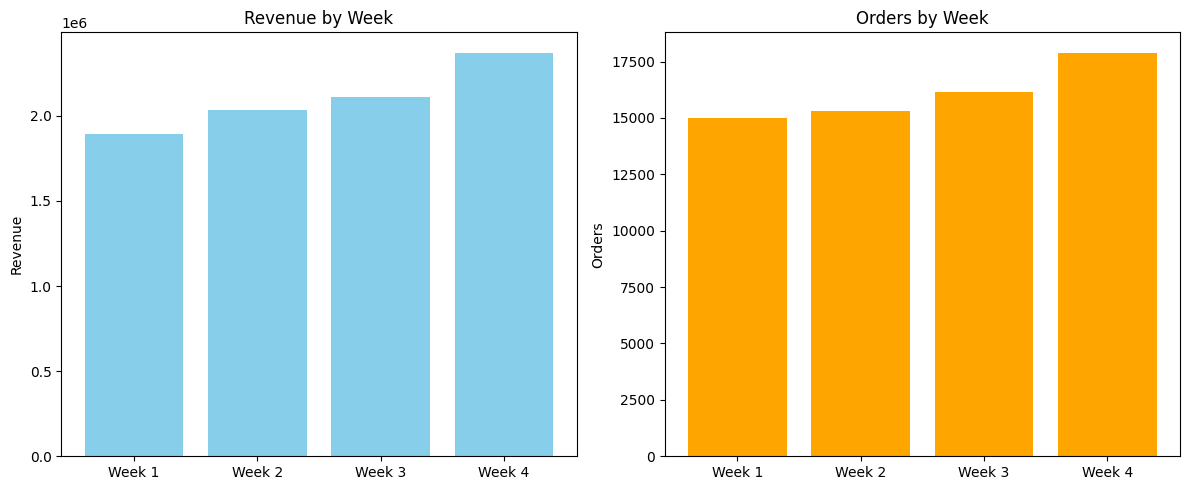

In [537]:
week_labels = ['Week 1', 'Week 2', 'Week 3', 'Week 4']

week_revenues = [df[col].sum() for col in [
    'WEEK1_DAY01_DAY07_REVENUE',
    'WEEK2_DAY08_DAY15_REVENUE',
    'WEEK3_DAY16_DAY23_REVENUE',
    'WEEK4_DAY24_DAY31_REVENUE'
]]

week_orders = [df[col].sum() for col in [
    'WEEK1_DAY01_DAY07_ORDERS',
    'WEEK2_DAY08_DAY15_ORDERS',
    'WEEK3_DAY16_DAY23_ORDERS',
    'WEEK4_DAY24_DAY31_ORDERS'
]]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].bar(week_labels, week_revenues, color='skyblue')
axs[0].set_title("Revenue by Week")
axs[0].set_ylabel("Revenue")

axs[1].bar(week_labels, week_orders, color='orange')
axs[1].set_title("Orders by Week")
axs[1].set_ylabel("Orders")

plt.tight_layout()
plt.show()


In [538]:
week_orders

[np.int64(14989), np.int64(15313), np.int64(16150), np.int64(17900)]

In [539]:
print(week_revenues)

[np.float64(1893191.73), np.float64(2032978.67), np.float64(2109134.54), np.float64(2372314.2600000002)]


## Revenue Forecasting

In [601]:
from prophet import Prophet

In [ ]:
df['LATEST_ORDER_DATE'] = pd.to_datetime(df['LATEST_ORDER_DATE'], errors='coerce')
df['OrderMonth'] = df['LATEST_ORDER_DATE'].dt.to_period('M').dt.to_timestamp()


monthly_revenue = df.groupby('OrderMonth')['REVENUE'].sum().reset_index()
monthly_revenue.columns = ['ds', 'y']

In [563]:
model = Prophet()
model.fit(monthly_revenue)

future = model.make_future_dataframe(periods=3, freq='M')
forecast = model.predict(future)

13:14:41 - cmdstanpy - INFO - Chain [1] start processing
13:14:42 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\deves\Desktop\uv\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


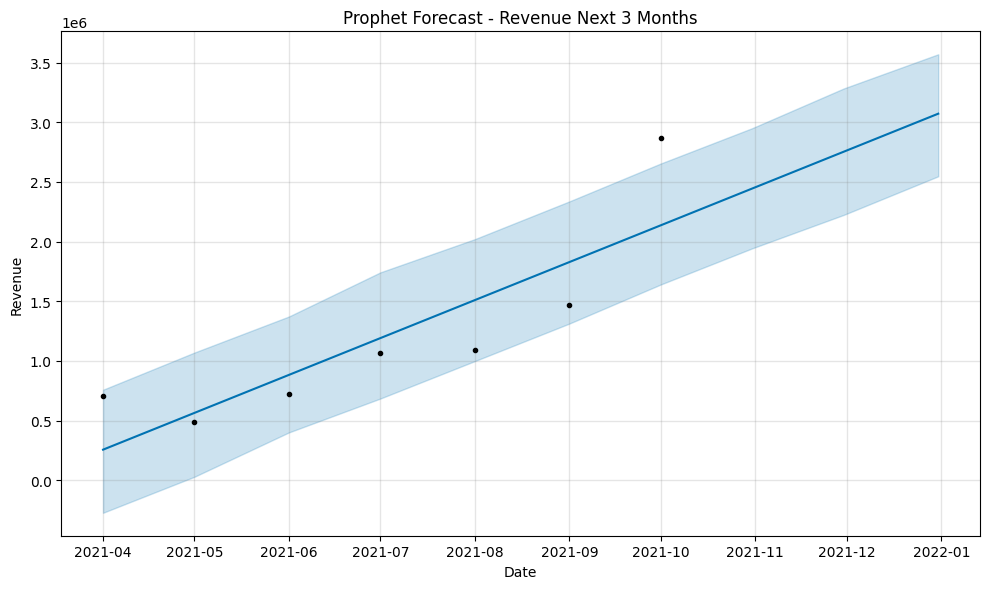

In [564]:
fig = model.plot(forecast)
plt.title("Prophet Forecast - Revenue Next 3 Months")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

In [565]:
forecast_renamed = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
forecast_renamed.columns = ['Month', 'ForecastedRevenue', 'LowerBound', 'UpperBound']

print(forecast_renamed.tail(3))

       Month  ForecastedRevenue    LowerBound    UpperBound
7 2021-10-31       2.444601e+06  1.943162e+06  2.950434e+06
8 2021-11-30       2.752862e+06  2.223242e+06  3.282899e+06
9 2021-12-31       3.071398e+06  2.546675e+06  3.569369e+06


## CLUSTERING CUSTOMERS

In [583]:
rfm_df = df[['REVENUE', 'TOTAL_ORDERS', 'DAYSSINCELASTORDER']].dropna()

In [584]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['REVENUE', 'TOTAL_ORDERS', 'DAYSSINCELASTORDER']])

In [585]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)
print(rfm_df.groupby('Cluster').mean())


             REVENUE  TOTAL_ORDERS  DAYSSINCELASTORDER
Cluster                                               
0        2836.721841     21.850978           59.924051
1         561.726916      4.874604          187.301457
2         625.304091      5.455045           16.463967
3        7430.804336     47.477876           58.473451


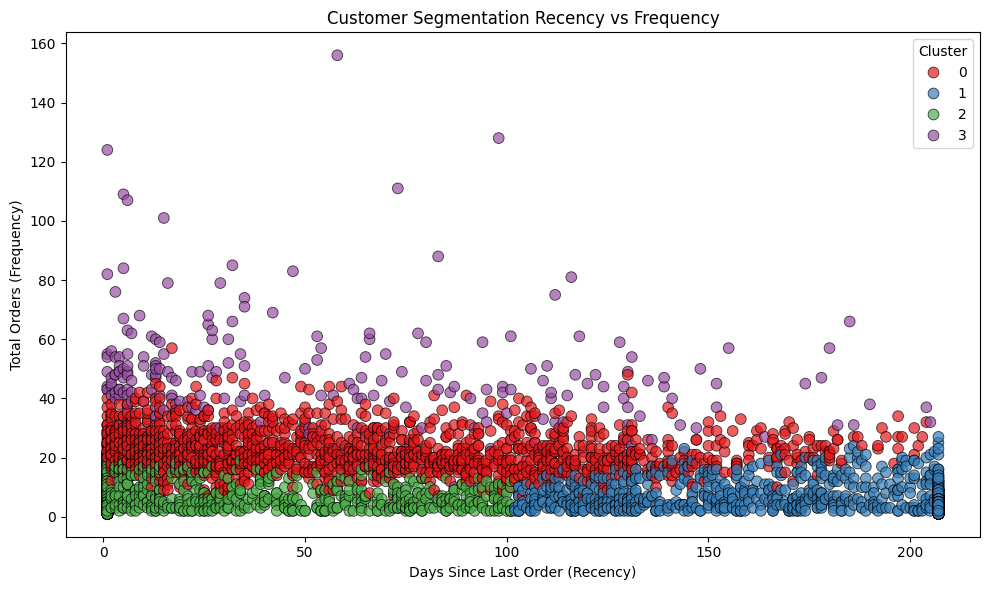

In [594]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm_df,
    x='DAYSSINCELASTORDER',
    y='TOTAL_ORDERS',
    hue='Cluster',
    palette='Set1',
    s=60,
    alpha=0.7,
    edgecolor='k'
)

plt.title('Customer Segmentation Recency vs Frequency')
plt.xlabel('Days Since Last Order (Recency)')
plt.ylabel('Total Orders (Frequency)')
plt.tight_layout()
plt.legend(title='Cluster')
plt.show()
